In [0]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras import regularizers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
random.seed(1234)

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, test_size = 0.16666, random_state = 1234)

In [51]:
network_org = models.Sequential()
network_org.add(layers.Dense(512, activation='relu', input_shape= (28 * 28,)))
network_org.add(layers.Dense(512, activation='relu'))
network_org.add(layers.Dense(512, activation='relu'))
network_org.add(layers.Dense(512, activation='relu'))
network_org.add(layers.Dense(10, activation='softmax'))
network_org.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_org = network_org.fit(train_images, train_labels, validation_data=(valid_images,valid_labels), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 2s 34us/step - loss: 0.4892 - acc: 0.8475 - val_loss: 0.1801 - val_acc: 0.9427
Epoch 2/200
50000/50000 [==============================] - 1s 11us/step - loss: 0.1569 - acc: 0.9521 - val_loss: 0.1631 - val_acc: 0.9471
Epoch 3/200
50000/50000 [==============================] - 1s 11us/step - loss: 0.0966 - acc: 0.9699 - val_loss: 0.1205 - val_acc: 0.9651
Epoch 4/200
50000/50000 [==============================] - 1s 11us/step - loss: 0.0647 - acc: 0.9800 - val_loss: 0.1110 - val_acc: 0.9679
Epoch 5/200
50000/50000 [==============================] - 1s 11us/step - loss: 0.0504 - acc: 0.9845 - val_loss: 0.0840 - val_acc: 0.9751
Epoch 6/200
50000/50000 [==============================] - 1s 11us/step - loss: 0.0334 - acc: 0.9897 - val_loss: 0.0835 - val_acc: 0.9775
Epoch 7/200
50000/50000 [==============================] - 1s 11us/step - loss: 0.0291 - acc: 0.9914 - val_loss: 0.1169 - 

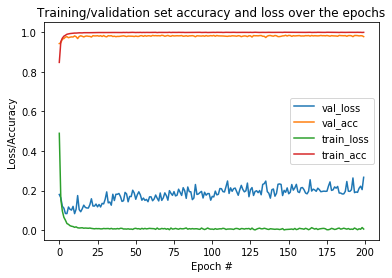

In [52]:
plt.plot(result_org.history["val_loss"], label="val_loss")
plt.plot(result_org.history["val_acc"], label="val_acc")
plt.plot(result_org.history["loss"], label="train_loss")
plt.plot(result_org.history["acc"], label="train_acc")
plt.title("Training/validation set accuracy and loss over the epochs")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

The model starts to degrade based on the validation set when the number of epoch is around 10.

In [53]:
#Dropout
network_dropout = models.Sequential()
network_dropout.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(512, activation='relu'))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(512, activation='relu'))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(512, activation='relu'))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(10, activation='softmax'))
network_dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_dropout = network_dropout.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 2s 36us/step - loss: 0.7134 - acc: 0.7653 - val_loss: 0.2232 - val_acc: 0.9341
Epoch 2/200
50000/50000 [==============================] - 1s 11us/step - loss: 0.2595 - acc: 0.9238 - val_loss: 0.1514 - val_acc: 0.9557
Epoch 3/200
50000/50000 [==============================] - 1s 11us/step - loss: 0.1975 - acc: 0.9434 - val_loss: 0.1202 - val_acc: 0.9647
Epoch 4/200
50000/50000 [==============================] - 1s 11us/step - loss: 0.1619 - acc: 0.9540 - val_loss: 0.1023 - val_acc: 0.9696
Epoch 5/200
50000/50000 [==============================] - 1s 11us/step - loss: 0.1389 - acc: 0.9598 - val_loss: 0.0963 - val_acc: 0.9706
Epoch 6/200
50000/50000 [==============================] - 1s 11us/step - loss: 0.1252 - acc: 0.9651 - val_loss: 0.0988 - val_acc: 0.9707
Epoch 7/200
50000/50000 [==============================] - 1s 11us/step - loss: 0.1207 - acc: 0.9672 - val_loss: 0.0897 - 

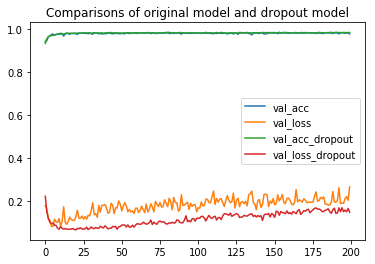

In [54]:
plt.plot(result_org.history['val_acc'], label="val_acc")
plt.plot(result_org.history['val_loss'], label="val_loss")
plt.plot(result_dropout.history['val_acc'], label="val_acc_dropout")
plt.plot(result_dropout.history['val_loss'], label="val_loss_dropout")
plt.legend(['val_acc', 'val_loss', 'val_acc_dropout', 'val_loss_dropout'])
plt.title('Comparisons of original model and dropout model')
plt.show()

This new model performs better than the initial model in terms of val_loss, but for the val_acc, two models perform similarly.

In [55]:
#Weight regularization
network_l1 = models.Sequential()
network_l1.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
network_l1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network_l1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network_l1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network_l1.add(layers.Dense(10, activation='softmax'))
network_l1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_l1 = network_l1.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=200, batch_size=512)


Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 2s 39us/step - loss: 13.4932 - acc: 0.6674 - val_loss: 3.8824 - val_acc: 0.8080
Epoch 2/200
50000/50000 [==============================] - 1s 12us/step - loss: 2.9972 - acc: 0.7891 - val_loss: 2.5802 - val_acc: 0.7583
Epoch 3/200
50000/50000 [==============================] - 1s 11us/step - loss: 2.1943 - acc: 0.8295 - val_loss: 2.0299 - val_acc: 0.8379
Epoch 4/200
50000/50000 [==============================] - 1s 11us/step - loss: 1.8665 - acc: 0.8578 - val_loss: 1.7783 - val_acc: 0.8562
Epoch 5/200
50000/50000 [==============================] - 1s 12us/step - loss: 1.6862 - acc: 0.8730 - val_loss: 1.6725 - val_acc: 0.8590
Epoch 6/200
50000/50000 [==============================] - 1s 11us/step - loss: 1.5573 - acc: 0.8873 - val_loss: 1.5461 - val_acc: 0.8802
Epoch 7/200
50000/50000 [==============================] - 1s 11us/step - loss: 1.4692 - acc: 0.8963 - val_loss: 1.4215 -

In [56]:
network_l2 = models.Sequential()
network_l2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l2(0.001)))
network_l2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_l2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_l2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_l2.add(layers.Dense(10, activation='softmax'))
network_l2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_l2 = network_l2.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 2s 39us/step - loss: 1.7741 - acc: 0.8286 - val_loss: 1.0053 - val_acc: 0.9426
Epoch 2/200
50000/50000 [==============================] - 1s 11us/step - loss: 0.8361 - acc: 0.9352 - val_loss: 0.6125 - val_acc: 0.9524
Epoch 3/200
50000/50000 [==============================] - 1s 11us/step - loss: 0.5314 - acc: 0.9523 - val_loss: 0.4760 - val_acc: 0.9457
Epoch 4/200
50000/50000 [==============================] - 1s 11us/step - loss: 0.4018 - acc: 0.9605 - val_loss: 0.3517 - val_acc: 0.9621
Epoch 5/200
50000/50000 [==============================] - 1s 11us/step - loss: 0.3275 - acc: 0.9644 - val_loss: 0.3246 - val_acc: 0.9576
Epoch 6/200
50000/50000 [==============================] - 1s 11us/step - loss: 0.2886 - acc: 0.9672 - val_loss: 0.2491 - val_acc: 0.9746
Epoch 7/200
50000/50000 [==============================] - 1s 11us/step - loss: 0.2576 - acc: 0.9714 - val_loss: 0.2386 - 

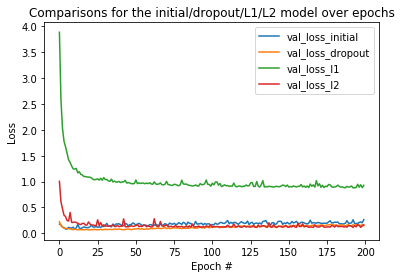

In [57]:
plt.plot(result_org.history['val_loss'], label="val_loss_initial")
plt.plot(result_dropout.history['val_loss'], label="val_loss_dropout")
plt.plot(result_l1.history['val_loss'], label="val_loss_11")
plt.plot(result_l2.history['val_loss'], label="val_loss_12")
plt.legend(['val_loss_initial', 'val_loss_dropout', 'val_loss_l1', 'val_loss_l2'])
plt.title('Comparisons for the initial/dropout/L1/L2 model over epochs')
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

Based on the plot above, L1-loss model doesn't perform so well like the other three models. The dropout model performs the best when the epoch number is smaller than 100, while the L2-loss model appears to perform the best when the epoch number is greater than 100.

In [58]:
#alternative models
network_drop3 = models.Sequential()
network_drop3.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_drop3.add(layers.Dropout(0.5))
network_drop3.add(layers.Dense(512, activation='relu'))
network_drop3.add(layers.Dropout(0.5))
network_drop3.add(layers.Dense(10, activation='softmax'))
network_drop3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

result_drop3 = network_drop3.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.4968 - acc: 0.8428 - val_loss: 0.2089 - val_acc: 0.9333
Epoch 2/100
50000/50000 [==============================] - 1s 11us/step - loss: 0.2107 - acc: 0.9364 - val_loss: 0.1328 - val_acc: 0.9574
Epoch 3/100
50000/50000 [==============================] - 1s 11us/step - loss: 0.1594 - acc: 0.9527 - val_loss: 0.1071 - val_acc: 0.9661
Epoch 4/100
50000/50000 [==============================] - 1s 11us/step - loss: 0.1282 - acc: 0.9613 - val_loss: 0.0944 - val_acc: 0.9705
Epoch 5/100
50000/50000 [==============================] - 1s 11us/step - loss: 0.1095 - acc: 0.9670 - val_loss: 0.0933 - val_acc: 0.9698
Epoch 6/100
50000/50000 [==============================] - 1s 11us/step - loss: 0.0946 - acc: 0.9694 - val_loss: 0.0847 - val_acc: 0.9737
Epoch 7/100
50000/50000 [==============================] - 1s 11us/step - loss: 0.0884 - acc: 0.9729 - val_loss: 0.0763 - 

In [59]:
network_drop4 = models.Sequential()
network_drop4.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_drop4.add(layers.Dropout(0.5))
network_drop4.add(layers.Dense(512, activation='relu'))
network_drop4.add(layers.Dropout(0.5))
network_drop4.add(layers.Dense(512, activation='relu'))
network_drop4.add(layers.Dropout(0.5))
network_drop4.add(layers.Dense(10, activation='softmax'))
network_drop4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

result_drop4 = network_drop4.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 41us/step - loss: 0.5925 - acc: 0.8104 - val_loss: 0.2032 - val_acc: 0.9370
Epoch 2/100
50000/50000 [==============================] - 1s 12us/step - loss: 0.2351 - acc: 0.9307 - val_loss: 0.1449 - val_acc: 0.9545
Epoch 3/100
50000/50000 [==============================] - 1s 11us/step - loss: 0.1727 - acc: 0.9494 - val_loss: 0.1138 - val_acc: 0.9663
Epoch 4/100
50000/50000 [==============================] - 1s 11us/step - loss: 0.1414 - acc: 0.9589 - val_loss: 0.1029 - val_acc: 0.9694
Epoch 5/100
50000/50000 [==============================] - 1s 11us/step - loss: 0.1256 - acc: 0.9635 - val_loss: 0.0858 - val_acc: 0.9724
Epoch 6/100
50000/50000 [==============================] - 1s 11us/step - loss: 0.1087 - acc: 0.9686 - val_loss: 0.0858 - val_acc: 0.9739
Epoch 7/100
50000/50000 [==============================] - 1s 11us/step - loss: 0.0972 - acc: 0.9706 - val_loss: 0.0771 - 

In [60]:
network_drop5 = models.Sequential()
network_drop5.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_drop5.add(layers.Dropout(0.5))
network_drop5.add(layers.Dense(512, activation='relu'))
network_drop5.add(layers.Dropout(0.5))
network_drop5.add(layers.Dense(512, activation='relu'))
network_drop5.add(layers.Dropout(0.5))
network_drop5.add(layers.Dense(512, activation='relu'))
network_drop5.add(layers.Dropout(0.5))
network_drop5.add(layers.Dense(10, activation='softmax'))
network_drop5.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

result_drop5 = network_drop5.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 46us/step - loss: 0.7139 - acc: 0.7636 - val_loss: 0.2153 - val_acc: 0.9340
Epoch 2/100
50000/50000 [==============================] - 1s 13us/step - loss: 0.2654 - acc: 0.9239 - val_loss: 0.1596 - val_acc: 0.9524
Epoch 3/100
50000/50000 [==============================] - 1s 12us/step - loss: 0.1989 - acc: 0.9439 - val_loss: 0.1257 - val_acc: 0.9643
Epoch 4/100
50000/50000 [==============================] - 1s 12us/step - loss: 0.1659 - acc: 0.9530 - val_loss: 0.1369 - val_acc: 0.9583
Epoch 5/100
50000/50000 [==============================] - 1s 12us/step - loss: 0.1404 - acc: 0.9601 - val_loss: 0.0954 - val_acc: 0.9730
Epoch 6/100
50000/50000 [==============================] - 1s 12us/step - loss: 0.1273 - acc: 0.9641 - val_loss: 0.0900 - val_acc: 0.9746
Epoch 7/100
50000/50000 [==============================] - 1s 12us/step - loss: 0.1128 - acc: 0.9691 - val_loss: 0.0832 - 

In [61]:
network_4 = models.Sequential()
network_4.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_4.add(layers.Dense(512, activation='relu'))
network_4.add(layers.Dense(512, activation='relu'))
network_4.add(layers.Dense(10, activation='softmax'))
network_4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

result_4 = network_4.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.4361 - acc: 0.8615 - val_loss: 0.1665 - val_acc: 0.9486
Epoch 2/100
50000/50000 [==============================] - 1s 11us/step - loss: 0.1424 - acc: 0.9556 - val_loss: 0.1771 - val_acc: 0.9414
Epoch 3/100
50000/50000 [==============================] - 1s 11us/step - loss: 0.0894 - acc: 0.9725 - val_loss: 0.0991 - val_acc: 0.9705
Epoch 4/100
50000/50000 [==============================] - 1s 11us/step - loss: 0.0606 - acc: 0.9818 - val_loss: 0.1282 - val_acc: 0.9607
Epoch 5/100
50000/50000 [==============================] - 1s 11us/step - loss: 0.0433 - acc: 0.9866 - val_loss: 0.0760 - val_acc: 0.9773
Epoch 6/100
50000/50000 [==============================] - 1s 10us/step - loss: 0.0297 - acc: 0.9902 - val_loss: 0.0770 - val_acc: 0.9776
Epoch 7/100
50000/50000 [==============================] - 1s 11us/step - loss: 0.0222 - acc: 0.9928 - val_loss: 0.0933 - 

In [62]:
network_3 = models.Sequential()
network_3.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_3.add(layers.Dense(512, activation='relu'))
network_3.add(layers.Dense(10, activation='softmax'))
network_3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

result_3 = network_3.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 43us/step - loss: 0.3916 - acc: 0.8792 - val_loss: 0.2327 - val_acc: 0.9226
Epoch 2/100
50000/50000 [==============================] - 1s 11us/step - loss: 0.1403 - acc: 0.9577 - val_loss: 0.1167 - val_acc: 0.9631
Epoch 3/100
50000/50000 [==============================] - 1s 10us/step - loss: 0.0879 - acc: 0.9732 - val_loss: 0.1203 - val_acc: 0.9606
Epoch 4/100
50000/50000 [==============================] - 1s 11us/step - loss: 0.0620 - acc: 0.9803 - val_loss: 0.0694 - val_acc: 0.9772
Epoch 5/100
50000/50000 [==============================] - 1s 11us/step - loss: 0.0431 - acc: 0.9863 - val_loss: 0.0687 - val_acc: 0.9786
Epoch 6/100
50000/50000 [==============================] - 1s 10us/step - loss: 0.0320 - acc: 0.9894 - val_loss: 0.0776 - val_acc: 0.9753
Epoch 7/100
50000/50000 [==============================] - 1s 11us/step - loss: 0.0228 - acc: 0.9928 - val_loss: 0.0923 - 

In [63]:
network_7 = models.Sequential()
network_7.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_7.add(layers.Dense(512, activation='relu'))
network_7.add(layers.Dense(512, activation='relu'))
network_7.add(layers.Dense(512, activation='relu'))
network_7.add(layers.Dense(512, activation='relu'))
network_7.add(layers.Dense(512, activation='relu'))
network_7.add(layers.Dense(10, activation='softmax'))
network_7.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

result_7 = network_7.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 49us/step - loss: 0.6557 - acc: 0.7850 - val_loss: 0.3096 - val_acc: 0.9140
Epoch 2/100
50000/50000 [==============================] - 1s 13us/step - loss: 0.1929 - acc: 0.9459 - val_loss: 0.1292 - val_acc: 0.9637
Epoch 3/100
50000/50000 [==============================] - 1s 13us/step - loss: 0.1185 - acc: 0.9672 - val_loss: 0.0935 - val_acc: 0.9738
Epoch 4/100
50000/50000 [==============================] - 1s 12us/step - loss: 0.0815 - acc: 0.9770 - val_loss: 0.1159 - val_acc: 0.9685
Epoch 5/100
50000/50000 [==============================] - 1s 12us/step - loss: 0.0590 - acc: 0.9835 - val_loss: 0.0838 - val_acc: 0.9764
Epoch 6/100
50000/50000 [==============================] - 1s 12us/step - loss: 0.0479 - acc: 0.9868 - val_loss: 0.1031 - val_acc: 0.9743
Epoch 7/100
50000/50000 [==============================] - 1s 12us/step - loss: 0.0406 - acc: 0.9897 - val_loss: 0.0953 - 

In [64]:
network_l1_3 = models.Sequential()
network_l1_3.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
network_l1_3.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network_l1_3.add(layers.Dense(10, activation='softmax'))
network_l1_3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_l1_3 = network_l1_3.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 49us/step - loss: 7.9337 - acc: 0.7980 - val_loss: 2.4928 - val_acc: 0.8321
Epoch 2/100
50000/50000 [==============================] - 1s 10us/step - loss: 1.8767 - acc: 0.8516 - val_loss: 1.4655 - val_acc: 0.8821
Epoch 3/100
50000/50000 [==============================] - 1s 11us/step - loss: 1.3354 - acc: 0.8801 - val_loss: 1.2200 - val_acc: 0.8802
Epoch 4/100
50000/50000 [==============================] - 1s 10us/step - loss: 1.1419 - acc: 0.8910 - val_loss: 1.0946 - val_acc: 0.8915
Epoch 5/100
50000/50000 [==============================] - 1s 11us/step - loss: 1.0359 - acc: 0.9027 - val_loss: 0.9839 - val_acc: 0.9069
Epoch 6/100
50000/50000 [==============================] - 1s 10us/step - loss: 0.9701 - acc: 0.9068 - val_loss: 0.9448 - val_acc: 0.9058
Epoch 7/100
50000/50000 [==============================] - 1s 10us/step - loss: 0.9252 - acc: 0.9140 - val_loss: 0.9300 - 

In [65]:
network_l2_3_256 = models.Sequential()
network_l2_3_256.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
network_l2_3_256.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_l2_3_256.add(layers.Dense(10, activation='softmax'))
network_l2_3_256.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_l2_3_256 = network_l2_3.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=100, batch_size=256)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 40us/step - loss: 0.3769 - acc: 0.9759 - val_loss: 0.4602 - val_acc: 0.9509
Epoch 2/100
50000/50000 [==============================] - 1s 17us/step - loss: 0.3780 - acc: 0.9759 - val_loss: 0.3931 - val_acc: 0.9724
Epoch 3/100
50000/50000 [==============================] - 1s 17us/step - loss: 0.3765 - acc: 0.9762 - val_loss: 0.4923 - val_acc: 0.9399
Epoch 4/100
50000/50000 [==============================] - 1s 17us/step - loss: 0.3761 - acc: 0.9763 - val_loss: 0.4481 - val_acc: 0.9538
Epoch 5/100
50000/50000 [==============================] - 1s 17us/step - loss: 0.3783 - acc: 0.9762 - val_loss: 0.4449 - val_acc: 0.9544
Epoch 6/100
50000/50000 [==============================] - 1s 17us/step - loss: 0.3773 - acc: 0.9750 - val_loss: 0.4144 - val_acc: 0.9640
Epoch 7/100
50000/50000 [==============================] - 1s 17us/step - loss: 0.3754 - acc: 0.9762 - val_loss: 0.4077 - 

In [66]:
network_l2_3 = models.Sequential()
network_l2_3.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
network_l2_3.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_l2_3.add(layers.Dense(10, activation='softmax'))
network_l2_3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_l2_3 = network_l2_3.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 47us/step - loss: 4.9561 - acc: 0.8217 - val_loss: 1.8289 - val_acc: 0.9025
Epoch 2/100
50000/50000 [==============================] - 1s 10us/step - loss: 1.4652 - acc: 0.8815 - val_loss: 1.1994 - val_acc: 0.8831
Epoch 3/100
50000/50000 [==============================] - 1s 11us/step - loss: 1.0229 - acc: 0.9023 - val_loss: 0.8824 - val_acc: 0.9199
Epoch 4/100
50000/50000 [==============================] - 1s 10us/step - loss: 0.8397 - acc: 0.9158 - val_loss: 0.8324 - val_acc: 0.9009
Epoch 5/100
50000/50000 [==============================] - 1s 11us/step - loss: 0.7358 - acc: 0.9281 - val_loss: 0.6812 - val_acc: 0.9382
Epoch 6/100
50000/50000 [==============================] - 1s 10us/step - loss: 0.6691 - acc: 0.9355 - val_loss: 0.6748 - val_acc: 0.9293
Epoch 7/100
50000/50000 [==============================] - 1s 10us/step - loss: 0.6277 - acc: 0.9417 - val_loss: 0.6042 - 

In [67]:
network_l2_4 = models.Sequential()
network_l2_4.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
network_l2_4.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_l2_4.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_l2_4.add(layers.Dense(10, activation='softmax'))
network_l2_4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_l2_4 = network_l2_4.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 54us/step - loss: 5.3888 - acc: 0.8007 - val_loss: 2.2788 - val_acc: 0.8513
Epoch 2/100
50000/50000 [==============================] - 1s 13us/step - loss: 1.6968 - acc: 0.8834 - val_loss: 1.2627 - val_acc: 0.9126
Epoch 3/100
50000/50000 [==============================] - 1s 12us/step - loss: 1.1292 - acc: 0.9048 - val_loss: 0.8947 - val_acc: 0.9370
Epoch 4/100
50000/50000 [==============================] - 1s 12us/step - loss: 0.8935 - acc: 0.9202 - val_loss: 0.7913 - val_acc: 0.9369
Epoch 5/100
50000/50000 [==============================] - 1s 12us/step - loss: 0.7606 - acc: 0.9321 - val_loss: 1.0395 - val_acc: 0.8162
Epoch 6/100
50000/50000 [==============================] - 1s 12us/step - loss: 0.6982 - acc: 0.9365 - val_loss: 0.6503 - val_acc: 0.9465
Epoch 7/100
50000/50000 [==============================] - 1s 12us/step - loss: 0.6474 - acc: 0.9427 - val_loss: 0.6373 - 

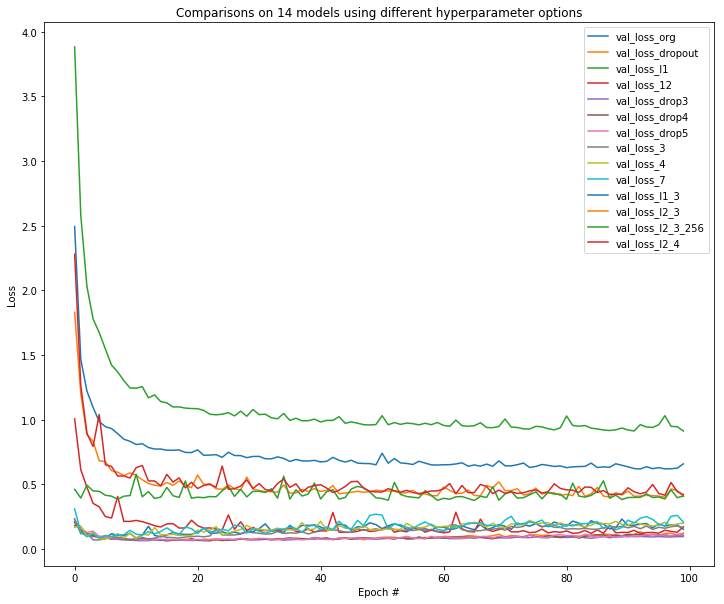

In [68]:
plt.figure(figsize=(12,10))

val_loss_org = result_org.history['val_loss']
val_loss_dropout = result_dropout.history['val_loss']
val_loss_l1 = result_l1.history['val_loss']
val_loss_l2 = result_l2.history['val_loss']
val_loss_drop3 = result_drop3.history['val_loss']
val_loss_drop4 = result_drop4.history['val_loss']
val_loss_drop5 = result_drop5.history['val_loss']
val_loss_3 = result_3.history['val_loss']
val_loss_4 = result_4.history['val_loss']
val_loss_7 = result_7.history['val_loss']
val_loss_l1_3 = result_l1_3.history['val_loss']
val_loss_l2_3 = result_l2_3.history['val_loss']
val_loss_l2_3_256 = result_l2_3_256.history['val_loss']
val_loss_l2_4 = result_l2_4.history['val_loss']

plt.plot(val_loss_org[:100])
plt.plot(val_loss_dropout[:100])
plt.plot(val_loss_l1[:100])
plt.plot(val_loss_l2[:100])
plt.plot(val_loss_drop3)
plt.plot(val_loss_drop4)
plt.plot(val_loss_drop5)
plt.plot(val_loss_3)
plt.plot(val_loss_4)
plt.plot(val_loss_7)
plt.plot(val_loss_l1_3)
plt.plot(val_loss_l2_3)
plt.plot(val_loss_l2_3_256)
plt.plot(val_loss_l2_4)
plt.legend(['val_loss_org', 'val_loss_dropout', 'val_loss_l1', 'val_loss_12', 'val_loss_drop3', 'val_loss_drop4', 'val_loss_drop5', 'val_loss_3', 'val_loss_4', 'val_loss_7', 'val_loss_l1_3', 'val_loss_l2_3', 'val_loss_l2_3_256', 'val_loss_l2_4'])
plt.title('Comparisons on 14 models using different hyperparameter options')
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

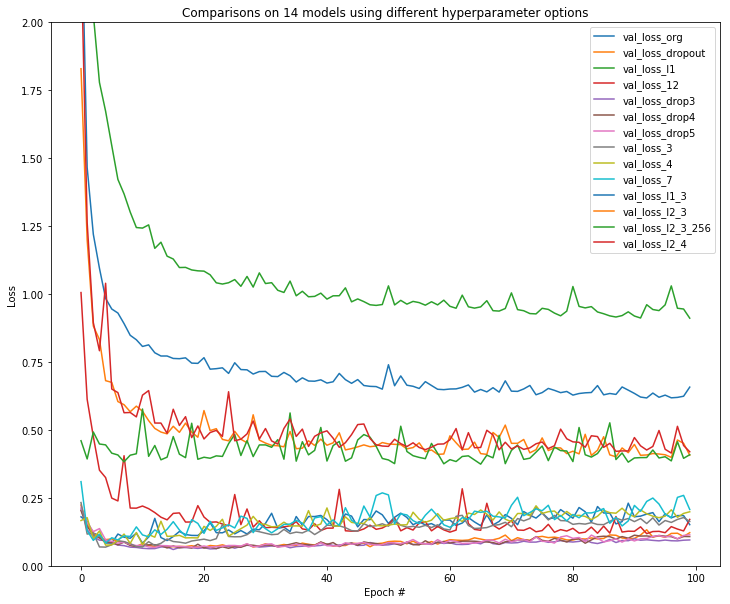

In [69]:
plt.figure(figsize=(12,10))

val_loss_org = result_org.history['val_loss']
val_loss_dropout = result_dropout.history['val_loss']
val_loss_l1 = result_l1.history['val_loss']
val_loss_l2 = result_l2.history['val_loss']
val_loss_drop3 = result_drop3.history['val_loss']
val_loss_drop4 = result_drop4.history['val_loss']
val_loss_drop5 = result_drop5.history['val_loss']
val_loss_3 = result_3.history['val_loss']
val_loss_4 = result_4.history['val_loss']
val_loss_7 = result_7.history['val_loss']
val_loss_l1_3 = result_l1_3.history['val_loss']
val_loss_l2_3 = result_l2_3.history['val_loss']
val_loss_l2_3_256 = result_l2_3_256.history['val_loss']
val_loss_l2_4 = result_l2_4.history['val_loss']

plt.plot(val_loss_org[:100])
plt.plot(val_loss_dropout[:100])
plt.plot(val_loss_l1[:100])
plt.plot(val_loss_l2[:100])
plt.plot(val_loss_drop3)
plt.plot(val_loss_drop4)
plt.plot(val_loss_drop5)
plt.plot(val_loss_3)
plt.plot(val_loss_4)
plt.plot(val_loss_7)
plt.plot(val_loss_l1_3)
plt.plot(val_loss_l2_3)
plt.plot(val_loss_l2_3_256)
plt.plot(val_loss_l2_4)
plt.legend(['val_loss_org', 'val_loss_dropout', 'val_loss_l1', 'val_loss_12', 'val_loss_drop3', 'val_loss_drop4', 'val_loss_drop5', 'val_loss_3', 'val_loss_4', 'val_loss_7', 'val_loss_l1_3', 'val_loss_l2_3', 'val_loss_l2_3_256', 'val_loss_l2_4'])
plt.title('Comparisons on 14 models using different hyperparameter options')
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.ylim((0,2))
plt.show()

Based on the first plot above, it is hard to tell which model is the best, so I generated the second plot to take a closer look. val_loss_drop5, val_loss_dropout, and val_loss_drop3 perform similarly well. Therefore, I select val_loss_drop3 (the validation loss for the models that the 3-layer model with dropout) as the best model and for the following analysis. 


In [70]:
#Final model
final_result = network_drop3.fit(train_images, train_labels, epochs=100, batch_size=512)

Epoch 1/100
50000/50000 [==============================] - 0s 10us/step - loss: 0.0191 - acc: 0.9949
Epoch 2/100
50000/50000 [==============================] - 0s 10us/step - loss: 0.0177 - acc: 0.9954
Epoch 3/100
50000/50000 [==============================] - 0s 9us/step - loss: 0.0174 - acc: 0.9955
Epoch 4/100
50000/50000 [==============================] - 0s 10us/step - loss: 0.0179 - acc: 0.9953
Epoch 5/100
50000/50000 [==============================] - 0s 9us/step - loss: 0.0161 - acc: 0.9955
Epoch 6/100
50000/50000 [==============================] - 0s 10us/step - loss: 0.0150 - acc: 0.9961
Epoch 7/100
50000/50000 [==============================] - 0s 9us/step - loss: 0.0181 - acc: 0.9952
Epoch 8/100
50000/50000 [==============================] - 0s 10us/step - loss: 0.0149 - acc: 0.9957
Epoch 9/100
50000/50000 [==============================] - 0s 10us/step - loss: 0.0176 - acc: 0.9956
Epoch 10/100
50000/50000 [==============================] - 0s 10us/step - loss: 0.0164 - acc:

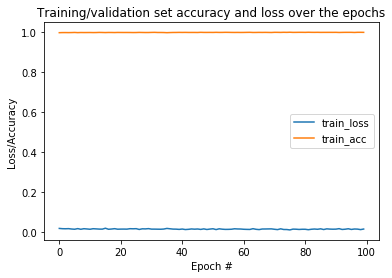

In [71]:
plt.plot(final_result.history["loss"], label="train_loss")
plt.plot(final_result.history["acc"], label="train_acc")
plt.title("Training/validation set accuracy and loss over the epochs")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [72]:
network_drop3.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 56us/step


[0.13093693458524738, 0.9843]

The test set loss and accuracy is 0.1309 and 0.9843, which performs well. The advantage of this model is its simplicity (three layers) which would be useful for low-dimension problems. The other models may cause overfitting. Also, dropout helps the model to generalize better.